In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

import plotly.express as px

from matplotlib import pyplot as plt
from dotenv import load_dotenv
from sklearn import preprocessing, model_selection
from sklearn import linear_model


load_dotenv()
sns.color_palette('colorblind')
plt.style.use('Solarize_Light2')

# Setting default DPI, pulling it from dotenv if it exists, setting it on 100 if not

pc_dpi = int(os.getenv('DPI'))

if pc_dpi is None:
    pc_dpi = 100


In [2]:
ready_data = "data/seattle_scaled_clean_data.csv"

df = pd.read_csv(ready_data)

In [3]:
df.set_index("OSEBuildingID", inplace=True)


In [10]:
fig = px.scatter_3d(
    data_frame=df,
    x="Energy_consumption_(PC1)",
    y="Pollution_generated_(PC2)",
    z="SourceEUI(kWh/m2)",
    color="ENERGYSTARScore",
    width=1000,
    height=800
    )

###
# Titles/Lables

#
###

fig.show()


In [5]:
df_train, df_test = model_selection.train_test_split(df, test_size=0.20)


In [6]:
df_train["ENERGYSTARScore"].describe()


count    694.000000
mean      67.926513
std       27.057505
min        1.000000
25%       53.250000
50%       75.000000
75%       90.000000
max      100.000000
Name: ENERGYSTARScore, dtype: float64

In [7]:
df_test["ENERGYSTARScore"].describe()


count    174.000000
mean      66.706897
std       26.203743
min        5.000000
25%       53.000000
50%       74.000000
75%       88.000000
max      100.000000
Name: ENERGYSTARScore, dtype: float64

In [8]:
kf = model_selection.KFold(n_splits=8)

for train, test in kf.split(df):
    print(len(train), len(test))


759 109
759 109
759 109
759 109
760 108
760 108
760 108
760 108


In [9]:
df_train

# X = >> PC1 -> GHG_E, Y = E*

,Energy_consumption_(PC1),Pollution_generated_(PC2),SourceEUI(kWh/m2),GHGEmissionsIntensity(kgCO2e/ft2),ENERGYSTARScore
OSEBuildingID,,,,,
26150,-0.420934,0.389694,-0.215705,0.153660,82.0
19874,-0.158959,-0.562307,0.514305,-0.718277,50.0
793,1.817093,-2.134585,0.464602,-0.620307,67.0
25325,-0.895310,0.601061,-1.104143,0.036096,91.0
290,0.464015,-0.274129,-0.663031,-0.502742,91.0
...,...,...,...,...,...
23757,-0.984015,0.442755,-1.046675,-0.355786,57.0
21796,-0.096776,0.350438,-0.740691,-0.316598,72.0
19860,-0.330780,-0.397423,1.519235,-0.492945,24.0


In [26]:
X_train = df_train[["Energy_consumption_(PC1)", "Pollution_generated_(PC2)",
    "SourceEUI(kWh/m2)", "GHGEmissionsIntensity(kgCO2e/ft2)", "ENERGYSTARScore"]].to_numpy()

Y_train = df_train[["ENERGYSTARScore"]].to_numpy()


In [33]:
X_test = df_test[["Energy_consumption_(PC1)", "Pollution_generated_(PC2)",
    "SourceEUI(kWh/m2)", "GHGEmissionsIntensity(kgCO2e/ft2)", "ENERGYSTARScore"]].to_numpy()

Y_test = df_test[["ENERGYSTARScore"]].to_numpy()


In [50]:
# Classic regression : 

linear_reg = linear_model.LinearRegression()

linear_reg.fit(X_train, Y_train)

predictions = linear_reg.predict(X_test)

predictions.shape

(174, 1)

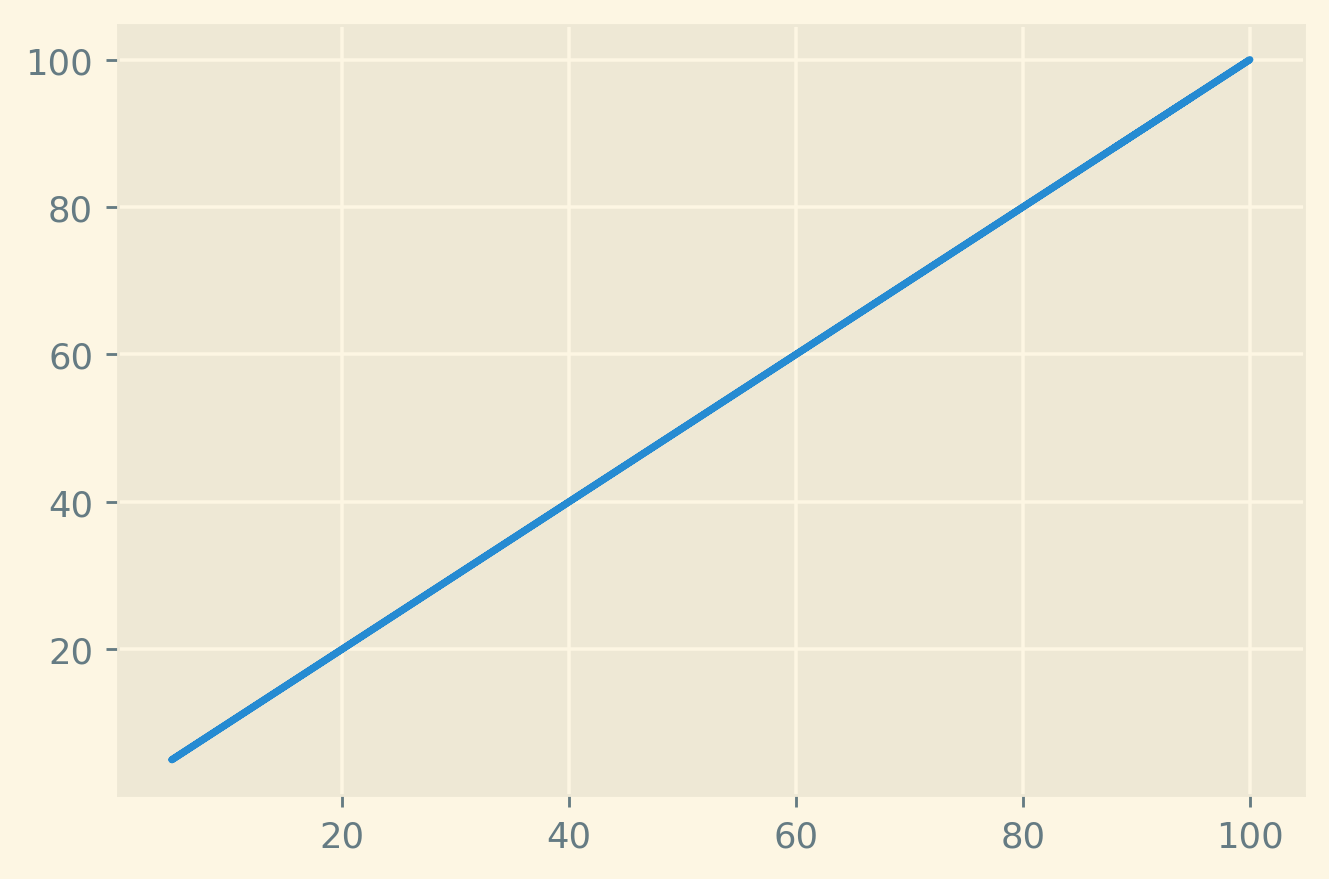

In [46]:
fig, (ax1) = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(6, 4),
    dpi=pc_dpi,
)

ax1.plot(predictions, Y_test)


###
# Titles/Lables

#
###

plt.show()


In [11]:
# Ridge

# ridge = linear_model.Ridge()

# coefs = []
# errors = []
# for alpha in alphas:
#     ridge.set_params(alpha=a)
#     ridge.fit(X_train, y_train)
#     coefs.append(ridge.coef_)
#     errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test) ** 2)])
